<a href="https://colab.research.google.com/github/Claudia-Cabrera/machine-learning-for-business-analytics/blob/main/Cabrera_Real_Eastate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import seaborn as sns
import matplotlib.pyplot as pltb

In [ ]:
# import data
# houses for sale
houses = pd.read_csv('/content/homesforsale (1).csv')

# housing prices data
prices_df = pd.read_csv('/content/Housing_Prices_24 (2).csv')

# **Data Overview & Cleaning**
Information from 1460 homes

Variables:
* Id: Property’s unique numeric identifier
* SalePrice	Sale: price ($) when the home was sold
* LotArea:	Area of the lot in square feet (SF)
* TotalBsmtSF:	Area of the basement in square feet (0 if the home does not have a basement)
* 1stFlrSF:	Total area of the 1st floor of the home in square feet
* 2ndFlrSF:	Total area of the 2nd floor of the home in square feet (0 if no 2nd floor)
* FullBath:	Total number of full bathrooms in the house
* HalfBath:	Total number of half bathrooms in the house
* BedroomAbvGr: Total number of bedrooms above ground (excluding the basement)
* TotRmsAbvGrd: Total number of rooms above ground (excluding the basement)
* Fireplaces:	Total number of fireplaces in the house
* GarageCars:	Total number of cars that fit into the garage (0 if no garage)
* WoodDeckSF:	Total square footage of wooden deck (0 if home doesn’t have a wooden deck)
* OpenPorchSF:	Total square footage of open porch (0 if home doesn’t have an open porch)
* EnclosedPorch:	Total square footage of enclosed porch (0 if home doesn’t have an enclosed porch)
* 3SsnPorch:	Total square footage of three-season sunroom (0 if home doesn’t have one)
* ScreenPorch:	Total square footage of screened porch (0 if home doesn’t have a screened porch)
* PoolArea:	Total square footage of outdoor pool (0 if home doesn’t have a pool)
* LotConfig:	Location of the lot with respect to the street (Inside, FR3, FR2, CulDSac, Corner)
* BldgType:	Type of home (1Fam - single-family detached, 2fmCon - condo, Duplex, Twnhs, TwnhsE)
* YearBuilt:	Year the home was built
* YearRemodAdd:	Year the home was remodeled or had an addition
* Foundation:	Type of foundation (BrkTil, CBlock, PConc, Slab, Stone, Wood)
* CentralAir:	Does the home have central air? (Y - yes, N - no)
* KitchenQual: Condition of the kitchen (Ex - excellent, Gd - good, TA - typical, Fa - fair)
* PavedDrive:	Driveway is paved? (Y - yes, N - no, P - partially paved)
* YrSold:	Year the home was last sold




In [ ]:
# preview the data
prices_df.head()

,Id,SalePrice,LotArea,TotalBsmtSF,1stFlrSF,2ndFlrSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,...,PoolArea,LotConfig,BldgType,YearBuilt,YearRemodAdd,Foundation,CentralAir,KitchenQual,PavedDrive,YrSold
0,1,208500,8450,856,856,854,2,1,3,8,...,0,Inside,1Fam,2003,2003,PConc,Y,Gd,Y,2008
1,2,181500,9600,1262,1262,0,2,0,3,6,...,0,FR2,1Fam,1976,1976,CBlock,Y,TA,Y,2007
2,3,223500,11250,920,920,866,2,1,3,6,...,0,Inside,1Fam,2001,2002,PConc,Y,Gd,Y,2008
3,4,140000,9550,756,961,756,1,0,3,7,...,0,Corner,1Fam,1915,1970,BrkTil,Y,Gd,Y,2006
4,5,250000,14260,1145,1145,1053,2,1,4,9,...,0,FR2,1Fam,2000,2000,PConc,Y,Gd,Y,2008


In [ ]:
# Check data types
prices_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id             1460 non-null   int64 
 1   SalePrice      1460 non-null   int64 
 2   LotArea        1460 non-null   int64 
 3   TotalBsmtSF    1460 non-null   int64 
 4   1stFlrSF       1460 non-null   int64 
 5   2ndFlrSF       1460 non-null   int64 
 6   FullBath       1460 non-null   int64 
 7   HalfBath       1460 non-null   int64 
 8   BedroomAbvGr   1460 non-null   int64 
 9   TotRmsAbvGrd   1460 non-null   int64 
 10  Fireplaces     1460 non-null   int64 
 11  GarageCars     1460 non-null   int64 
 12  WoodDeckSF     1460 non-null   int64 
 13  OpenPorchSF    1460 non-null   int64 
 14  EnclosedPorch  1460 non-null   int64 
 15  3SsnPorch      1460 non-null   int64 
 16  ScreenPorch    1460 non-null   int64 
 17  PoolArea       1460 non-null   int64 
 18  LotConfig      1460 non-null

In [ ]:
prices_df['YrSold'] = pd.to_datetime(prices_df['YrSold'], format='%Y').dt.year
prices_df['YearBuilt'] = pd.to_datetime(prices_df['YearBuilt'], format='%Y').dt.year
prices_df['YearRemodAdd'] = pd.to_datetime(prices_df['YearRemodAdd'], format='%Y').dt.year

In [ ]:
# Get a summary of the data
round((prices_df.describe()))

,Id,SalePrice,LotArea,TotalBsmtSF,1stFlrSF,2ndFlrSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,...,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,YearBuilt,YearRemodAdd,YrSold
count,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,...,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0
mean,730.0,180921.0,10517.0,1057.0,1163.0,347.0,2.0,0.0,3.0,7.0,...,2.0,94.0,47.0,22.0,3.0,15.0,3.0,1971.0,1985.0,2008.0
std,422.0,79443.0,9981.0,439.0,387.0,437.0,1.0,1.0,1.0,2.0,...,1.0,125.0,66.0,61.0,29.0,56.0,40.0,30.0,21.0,1.0
min,1.0,34900.0,1300.0,0.0,334.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1872.0,1950.0,2006.0
25%,366.0,129975.0,7554.0,796.0,882.0,0.0,1.0,0.0,2.0,5.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1954.0,1967.0,2007.0
50%,730.0,163000.0,9478.0,992.0,1087.0,0.0,2.0,0.0,3.0,6.0,...,2.0,0.0,25.0,0.0,0.0,0.0,0.0,1973.0,1994.0,2008.0
75%,1095.0,214000.0,11602.0,1298.0,1391.0,728.0,2.0,1.0,3.0,7.0,...,2.0,168.0,68.0,0.0,0.0,0.0,0.0,2000.0,2004.0,2009.0
max,1460.0,755000.0,215245.0,6110.0,4692.0,2065.0,3.0,2.0,8.0,14.0,...,4.0,857.0,547.0,552.0,508.0,480.0,738.0,2010.0,2010.0,2010.0


In [ ]:
# Check for missing values
prices_df.isnull().sum()

,0
Id,0
SalePrice,0
LotArea,0
TotalBsmtSF,0
1stFlrSF,0
2ndFlrSF,0
FullBath,0
HalfBath,0
BedroomAbvGr,0
TotRmsAbvGrd,0


## Categorical Variables Transformation


*  LotConfig:  Inside = 0, FR3 = 1, FR2 = 2, CulDSac = 3, Corner = 4
*  BldgType: 1Fam = 0, condo = 1, Duplex = 2, Twnhs = 3, TwnhsE = 4
*  Foundation: BrkTil = 0, CBlock = 1, PConc = 2, Slab = 3, Stone = 4, Wood = 5
*  CentralAir: Y = 0, N = 1
*  KitchenQual: Ex = 1 , Gd = 2, TA = 3, Fa = 4
*  PavedDrive: Y = 0, N = 1, P = 2





In [ ]:
prices_regression = prices_df.copy()
# Transform categorical variables
prices_regression['LotConfig'] = prices_regression['LotConfig'].map({'Inside': 0, 'FR3': 1, 'FR2': 2, 'CulDSac': 3, 'Corner': 4})
prices_regression['BldgType'] = prices_regression['BldgType'].map({'1Fam': 0, '2fmCon': 1, 'Duplex': 2, 'Twnhs': 3, 'TwnhsE': 4})
prices_regression['Foundation'] = prices_regression['Foundation'].map({'BrkTil': 0, 'CBlock': 1, 'PConc': 2, 'Slab': 3, 'Stone': 4, 'Wood': 5})
prices_regression['CentralAir'] = prices_regression['CentralAir'].map({'Y': 0, 'N': 1})
prices_regression['KitchenQual'] = prices_regression['KitchenQual'].map({'Ex': 1, 'Gd': 2, 'TA': 3, 'Fa': 4})
prices_regression['PavedDrive'] = prices_regression['PavedDrive'].map({'Y': 0, 'N': 1, 'P': 2})

prices_regression.head()


,Id,SalePrice,LotArea,TotalBsmtSF,1stFlrSF,2ndFlrSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,...,PoolArea,LotConfig,BldgType,YearBuilt,YearRemodAdd,Foundation,CentralAir,KitchenQual,PavedDrive,YrSold
0,1,208500,8450,856,856,854,2,1,3,8,...,0,0,0,2003,2003,2,0,2,0,2008
1,2,181500,9600,1262,1262,0,2,0,3,6,...,0,2,0,1976,1976,1,0,3,0,2007
2,3,223500,11250,920,920,866,2,1,3,6,...,0,0,0,2001,2002,2,0,2,0,2008
3,4,140000,9550,756,961,756,1,0,3,7,...,0,4,0,1915,1970,0,0,2,0,2006
4,5,250000,14260,1145,1145,1053,2,1,4,9,...,0,2,0,2000,2000,2,0,2,0,2008


# **Exploratory Data Analysis**

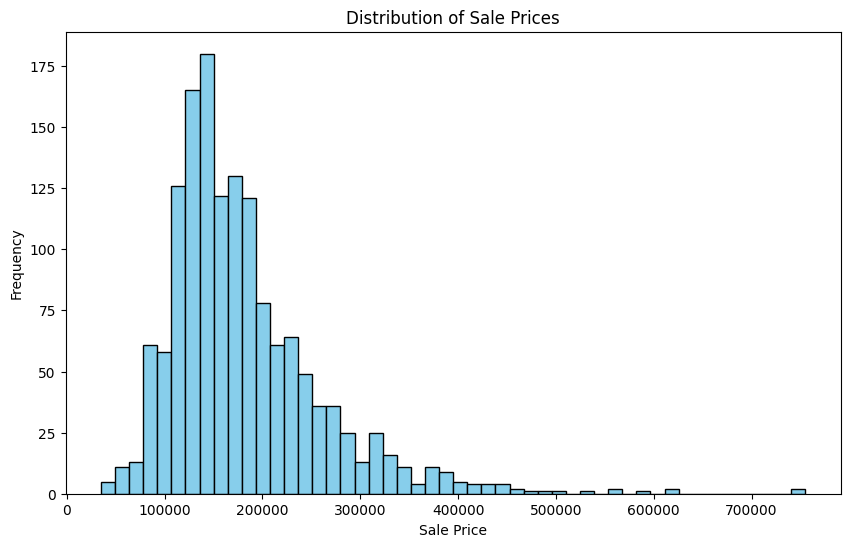

In [ ]:
# historgram of sale price of houses
plt.figure(figsize=(10, 6))
plt.hist(prices_df['SalePrice'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Sale Prices')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.show()


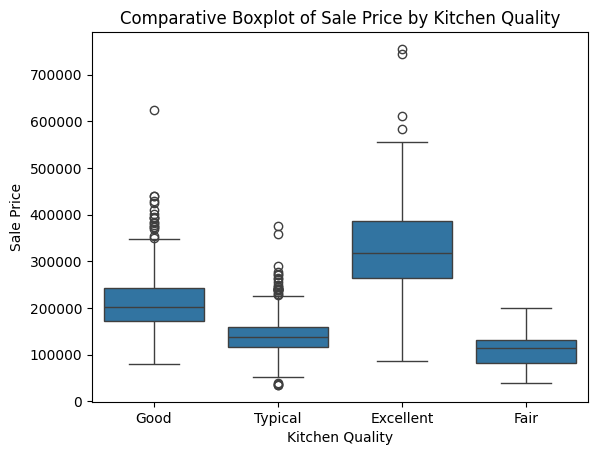

In [ ]:
# Look at Price vs. Kitchen Quality
sns.boxplot(x="KitchenQual", y="SalePrice", data=prices_df)

# Add labels and a title
plt.xlabel("Kitchen Quality")
plt.xticks(ticks=[0, 1, 2, 3], labels=['Good', 'Typical', 'Excellent', 'Fair'])

plt.ylabel("Sale Price")
plt.title("Comparative Boxplot of Sale Price by Kitchen Quality")

# Show the plot
plt.show()

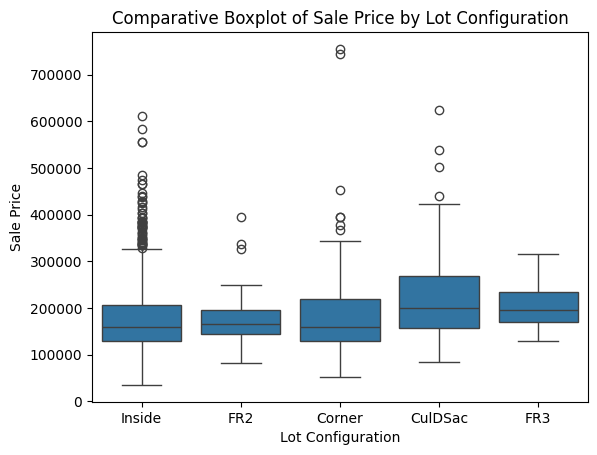

In [ ]:
# Look at Price vs. Kitchen Quality
sns.boxplot(x="LotConfig", y="SalePrice", data=prices_df)

# Add labels and a title
plt.xlabel("Lot Configuration")


plt.ylabel("Sale Price")
plt.title("Comparative Boxplot of Sale Price by Lot Configuration")

# Show the plot
plt.show()

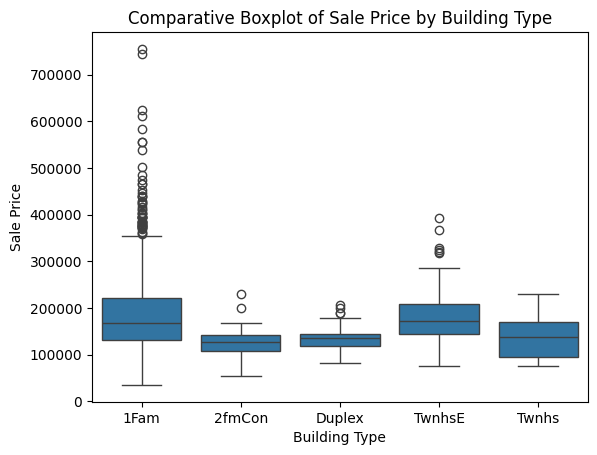

In [ ]:
# prompt: box plot of sale price vs BldgType

import matplotlib.pyplot as plt
# Look at Price vs. BldgType
sns.boxplot(x="BldgType", y="SalePrice", data=prices_df)

# Add labels and a title
plt.xlabel("Building Type")


plt.ylabel("Sale Price")
plt.title("Comparative Boxplot of Sale Price by Building Type")

# Show the plot
plt.show()


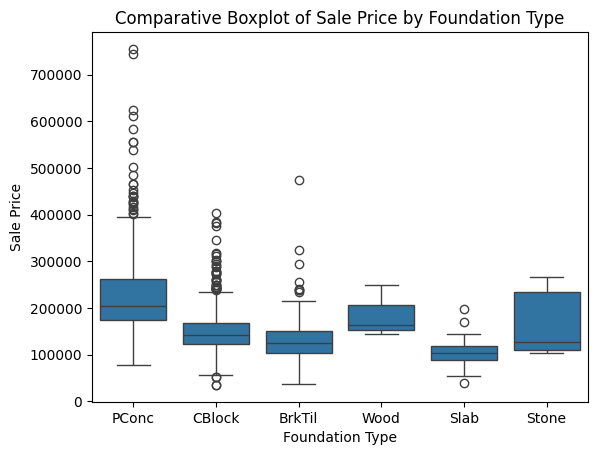

In [ ]:
# prompt: boxplot of saleprice vs. founcation

import matplotlib.pyplot as plt
# Look at Price vs. Foundation
sns.boxplot(x="Foundation", y="SalePrice", data=prices_df)

# Add labels and a title
plt.xlabel("Foundation Type")


plt.ylabel("Sale Price")
plt.title("Comparative Boxplot of Sale Price by Foundation Type")

# Show the plot
plt.show()


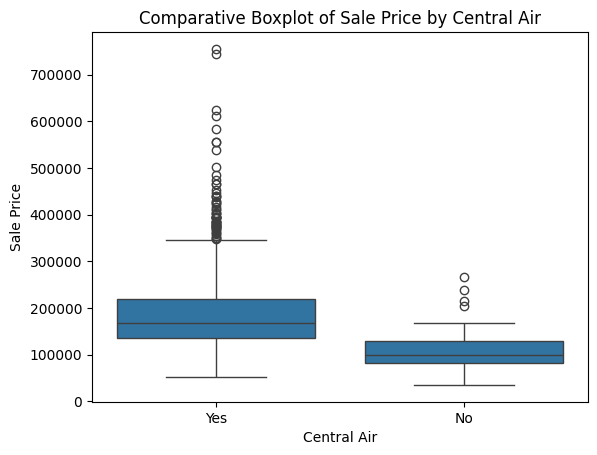

In [ ]:
# prompt: box plot of sale price vs. Central Air

import matplotlib.pyplot as plt
# Look at Price vs. Central Air
sns.boxplot(x="CentralAir", y="SalePrice", data=prices_df)

# Add labels and a title
plt.xlabel("Central Air")
plt.xticks(ticks=[0, 1], labels=['Yes', 'No'])

plt.ylabel("Sale Price")
plt.title("Comparative Boxplot of Sale Price by Central Air")

# Show the plot
plt.show()


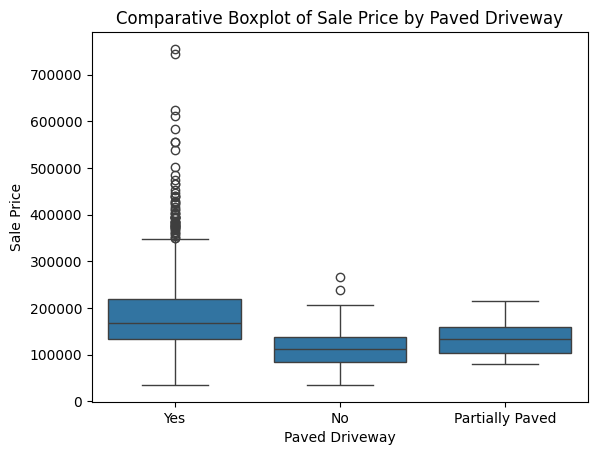

In [ ]:
# prompt: boxplot of sale price vs. driveway

import matplotlib.pyplot as plt
# Look at Price vs. PavedDrive
sns.boxplot(x="PavedDrive", y="SalePrice", data=prices_df)

# Add labels and a title
plt.xlabel("Paved Driveway")
plt.xticks(ticks=[0, 1, 2], labels=['Yes', 'No', 'Partially Paved'])

plt.ylabel("Sale Price")
plt.title("Comparative Boxplot of Sale Price by Paved Driveway")

# Show the plot
plt.show()


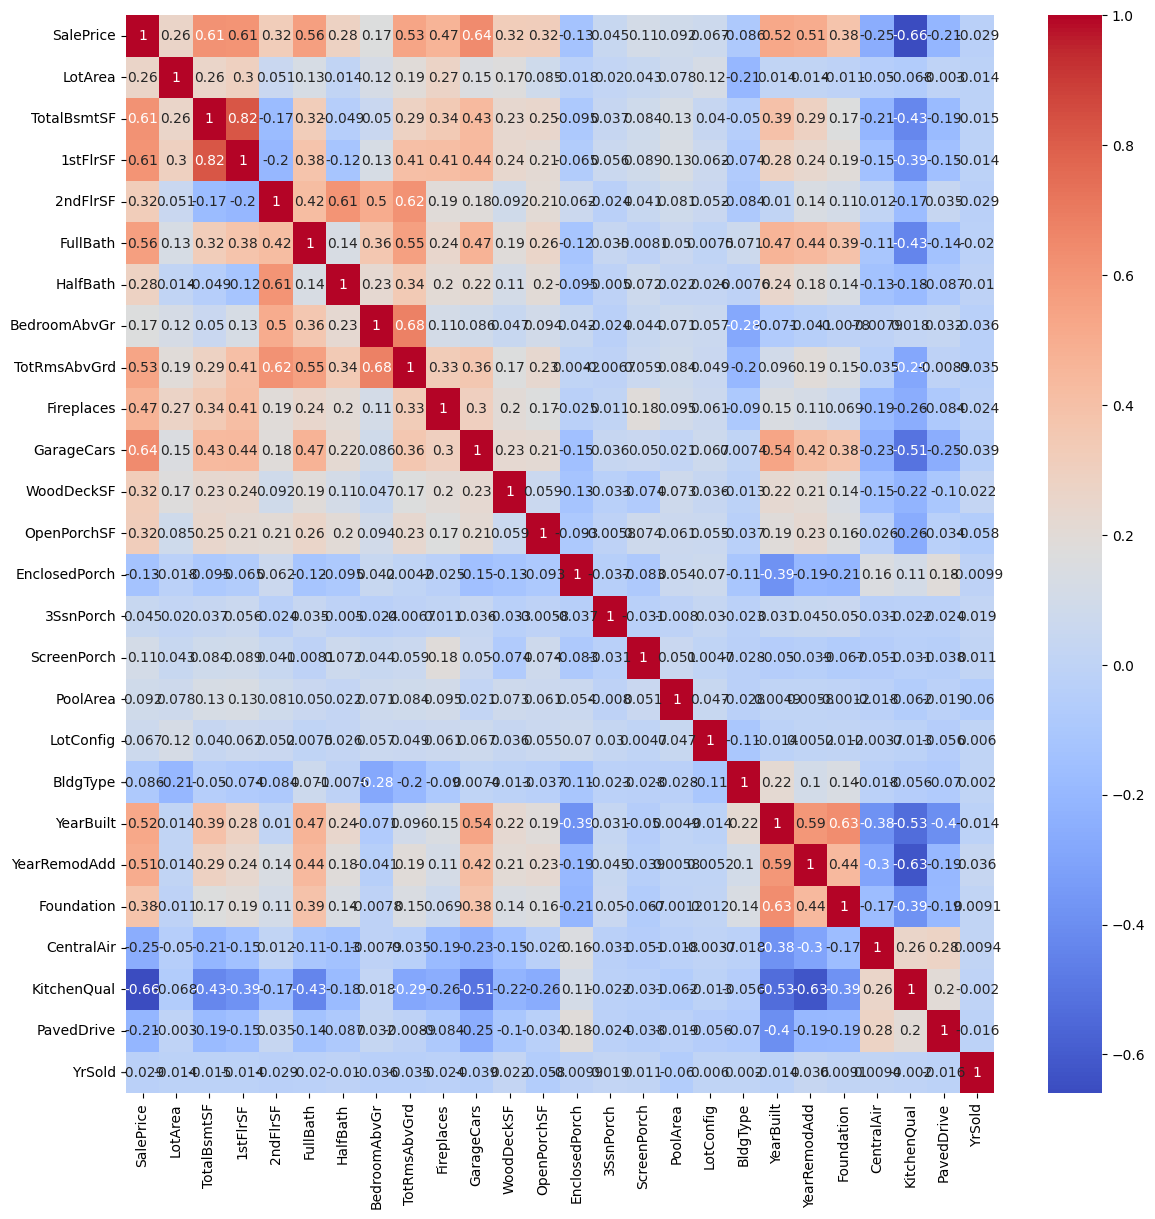

In [ ]:
# Correlations
# Calculate the correlation matrix
correlation_matrix = prices_regression.corr()

# Remove the 'Id' column
correlation_matrix = correlation_matrix.drop(columns=['Id'])
correlation_matrix = correlation_matrix.drop(index=['Id'])

# Display the correlation matrix
plt.figure(figsize=(14, 14))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

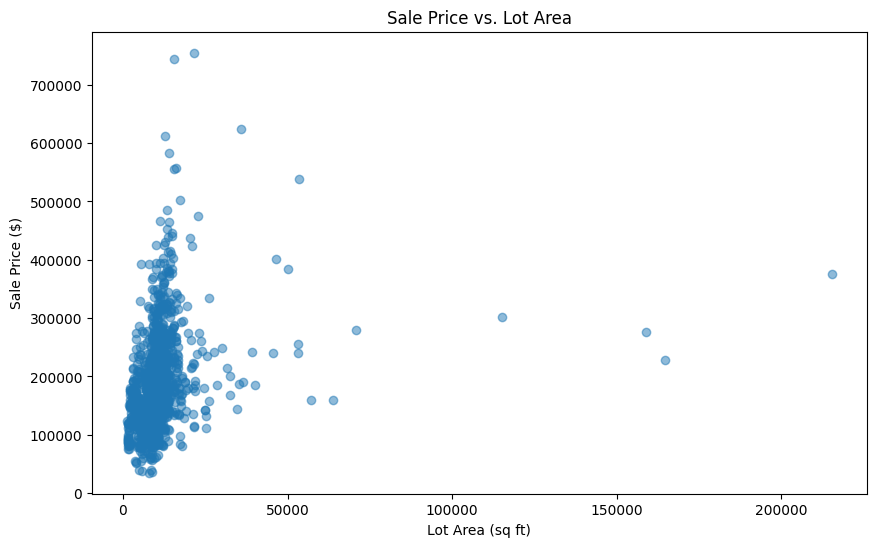

In [ ]:
# prompt: scatterplot of Saleprice vs.Lotsize

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(prices_df['LotArea'], prices_df['SalePrice'], alpha=0.5)
plt.title('Sale Price vs. Lot Area')
plt.xlabel('Lot Area (sq ft)')
plt.ylabel('Sale Price ($)')
plt.show()


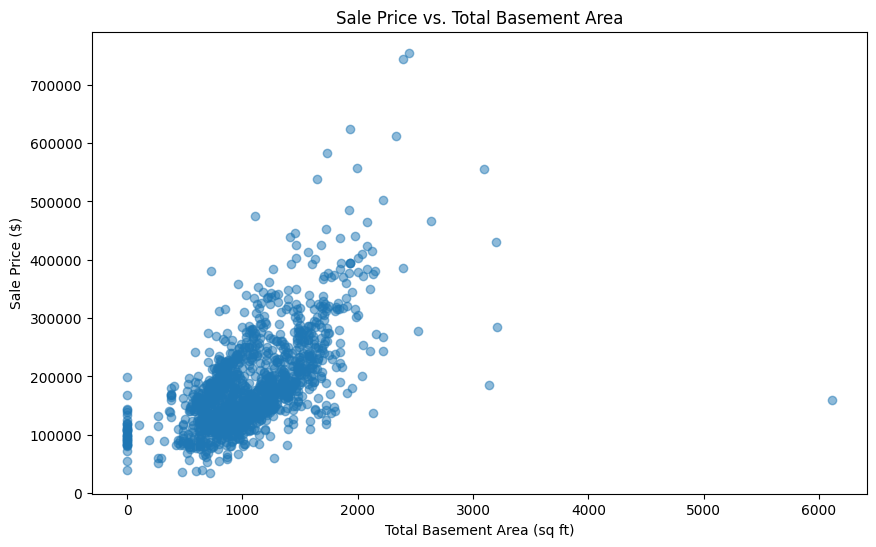

In [ ]:
#  scatterplot of SalePrice vs TotalBasement

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(prices_df['TotalBsmtSF'], prices_df['SalePrice'], alpha=0.5)
plt.title('Sale Price vs. Total Basement Area')
plt.xlabel('Total Basement Area (sq ft)')
plt.ylabel('Sale Price ($)')
plt.show()


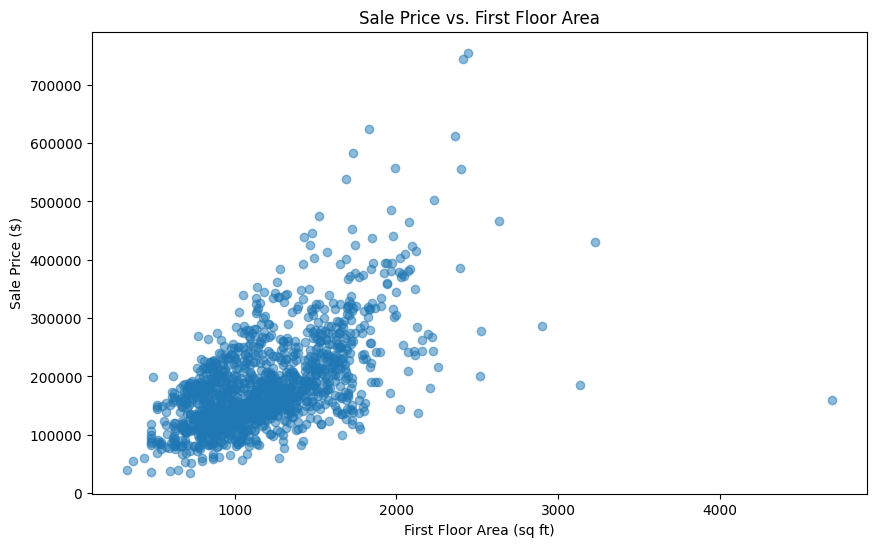

In [ ]:
# scatterplot vs. first floor
plt.figure(figsize=(10, 6))
plt.scatter(prices_df['1stFlrSF'], prices_df['SalePrice'], alpha=0.5)
plt.title('Sale Price vs. First Floor Area')
plt.xlabel('First Floor Area (sq ft)')
plt.ylabel('Sale Price ($)')
plt.show()


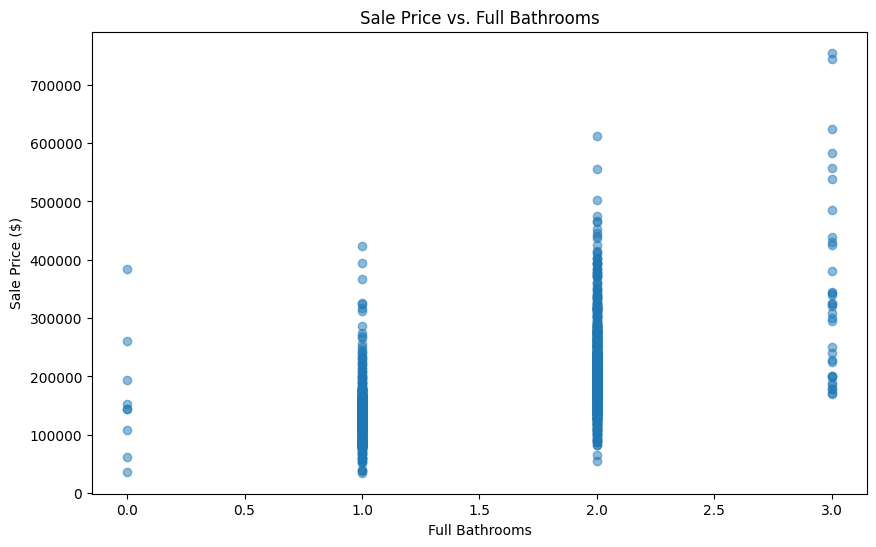

In [ ]:
# scatterplot Saleprice vs. fullbath

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(prices_df['FullBath'], prices_df['SalePrice'], alpha=0.5)
plt.title('Sale Price vs. Full Bathrooms')
plt.xlabel('Full Bathrooms')
plt.ylabel('Sale Price ($)')
plt.show()


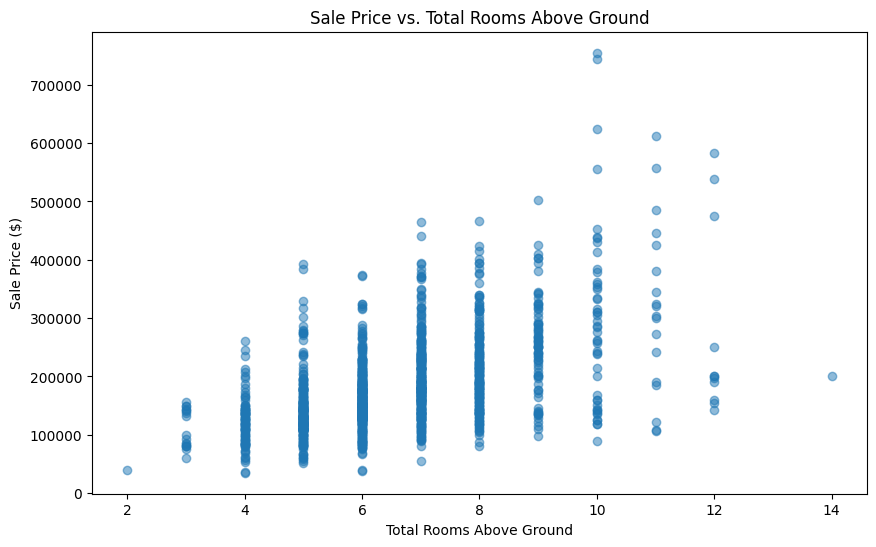

In [ ]:
#scatterplot of saleprice vs. roomsaboveground

plt.figure(figsize=(10, 6))
plt.scatter(prices_df['TotRmsAbvGrd'], prices_df['SalePrice'], alpha=0.5)
plt.title('Sale Price vs. Total Rooms Above Ground')
plt.xlabel('Total Rooms Above Ground')
plt.ylabel('Sale Price ($)')
plt.show()


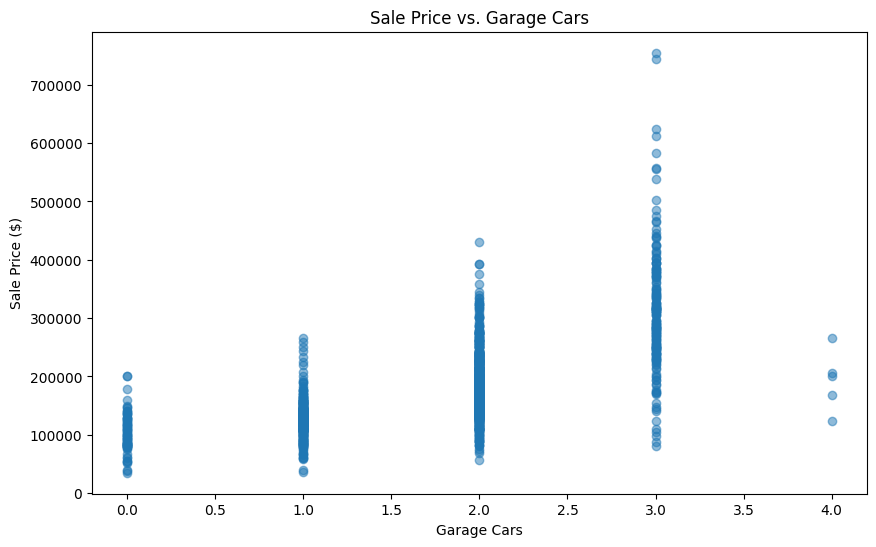

In [ ]:
# scatterplot of saleprice vs garagecars

plt.figure(figsize=(10, 6))
plt.scatter(prices_df['GarageCars'], prices_df['SalePrice'], alpha=0.5)
plt.title('Sale Price vs. Garage Cars')
plt.xlabel('Garage Cars')
plt.ylabel('Sale Price ($)')
plt.show()


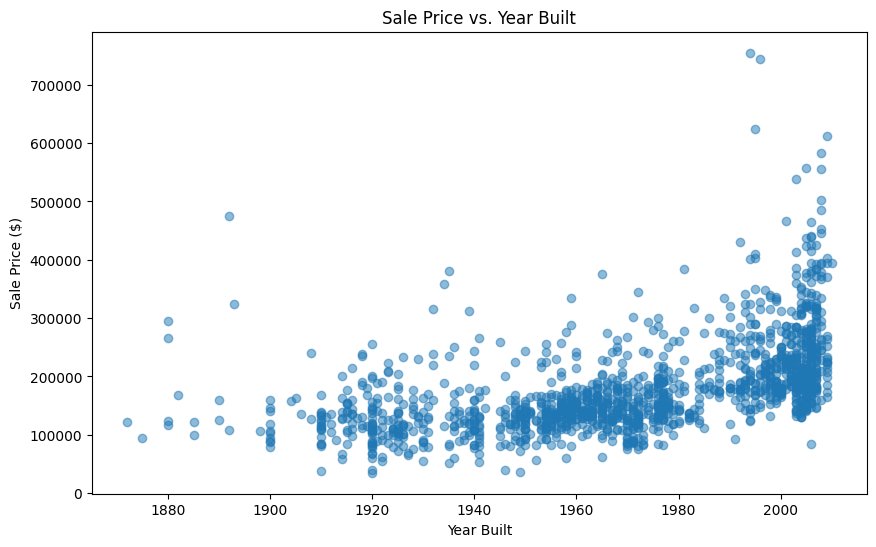

In [ ]:
# scatterplot of saleprice vs. year built

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(prices_df['YearBuilt'], prices_df['SalePrice'], alpha=0.5)
plt.title('Sale Price vs. Year Built')
plt.xlabel('Year Built')
plt.ylabel('Sale Price ($)')
plt.show()


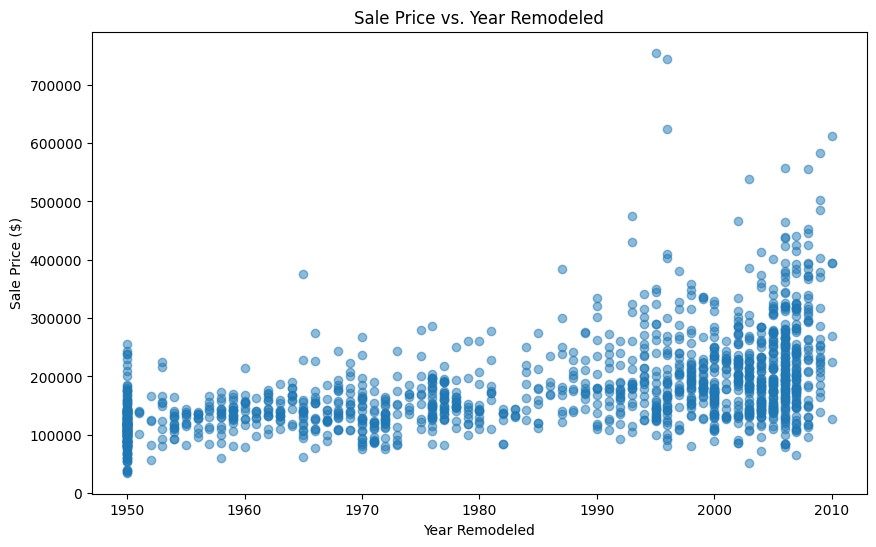

In [ ]:
# prompt: scatterplot of sale price vs. year remodel

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(prices_df['YearRemodAdd'], prices_df['SalePrice'], alpha=0.5)
plt.title('Sale Price vs. Year Remodeled')
plt.xlabel('Year Remodeled')
plt.ylabel('Sale Price ($)')
plt.show()


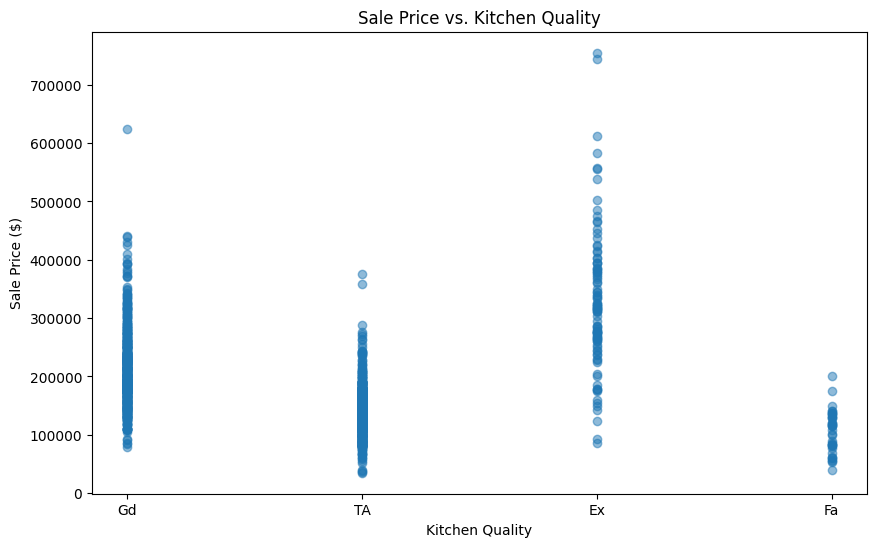

In [ ]:
# scatterplot of Sale price vs kitchen quality

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(prices_df['KitchenQual'], prices_df['SalePrice'], alpha=0.5)
plt.title('Sale Price vs. Kitchen Quality')
plt.xlabel('Kitchen Quality')
plt.ylabel('Sale Price ($)')
plt.show()


# **Build Regression Model**

SalePrice=−1,124,000+0.3287(LotArea)+28.4955(TotalBsmtSF)+56.7787(1stFlrSF)+59.1682(2ndFlrSF)−11,710(BedroomAbvGr)+3,418.07(TotRmsAbvGrd)+8853.37(Fireplaces)+13,490(GarageCars)+30.9419(WoodDeckSF)+64.6822(ScreenPorch)−5619.6844(BldgType)+421.4058(YearBuilt)+198.3027(YearRemodAdd)−23,560(KitchenQual)

## Fit Full Model

In [ ]:
prices_regression = prices_regression.drop(columns=['Id'])
# fit full regression model
X = prices_regression.drop(columns=['SalePrice'])
y = prices_regression['SalePrice']
X = sm.add_constant(X)
reg1 = sm.OLS(y, X).fit()

# Display regression summary
print(reg1.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     202.9
Date:                Mon, 09 Sep 2024   Prob (F-statistic):               0.00
Time:                        13:52:26   Log-Likelihood:                -17440.
No. Observations:                1460   AIC:                         3.493e+04
Df Residuals:                    1434   BIC:                         3.507e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2.831e+05   1.51e+06      0.188

In [ ]:
vifres = pd.DataFrame()
vifres["Variable"] = X.columns
vifres["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vifres)

         Variable           VIF
0           const  2.350469e+06
1         LotArea  1.215242e+00
2     TotalBsmtSF  3.699939e+00
3        1stFlrSF  5.811130e+00
4        2ndFlrSF  5.006210e+00
5        FullBath  2.730521e+00
6        HalfBath  2.170517e+00
7    BedroomAbvGr  2.316208e+00
8    TotRmsAbvGrd  4.409173e+00
9      Fireplaces  1.493949e+00
10     GarageCars  1.906647e+00
11     WoodDeckSF  1.172558e+00
12    OpenPorchSF  1.208520e+00
13  EnclosedPorch  1.262223e+00
14      3SsnPorch  1.019220e+00
15    ScreenPorch  1.100373e+00
16       PoolArea  1.063415e+00
17      LotConfig  1.046536e+00
18       BldgType  1.235384e+00
19      YearBuilt  4.241943e+00
20   YearRemodAdd  2.092986e+00
21     Foundation  1.879173e+00
22     CentralAir  1.296575e+00
23    KitchenQual  2.171430e+00
24     PavedDrive  1.247738e+00
25         YrSold  1.017324e+00


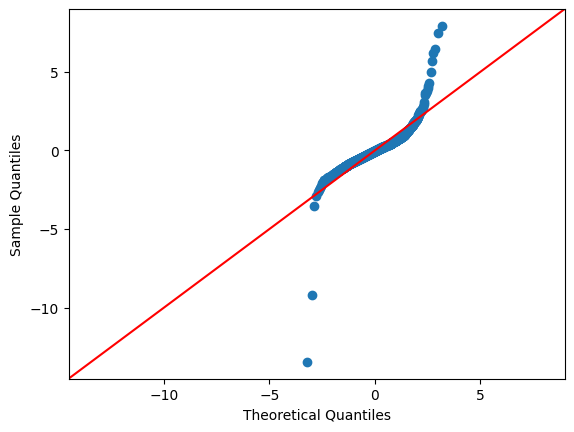

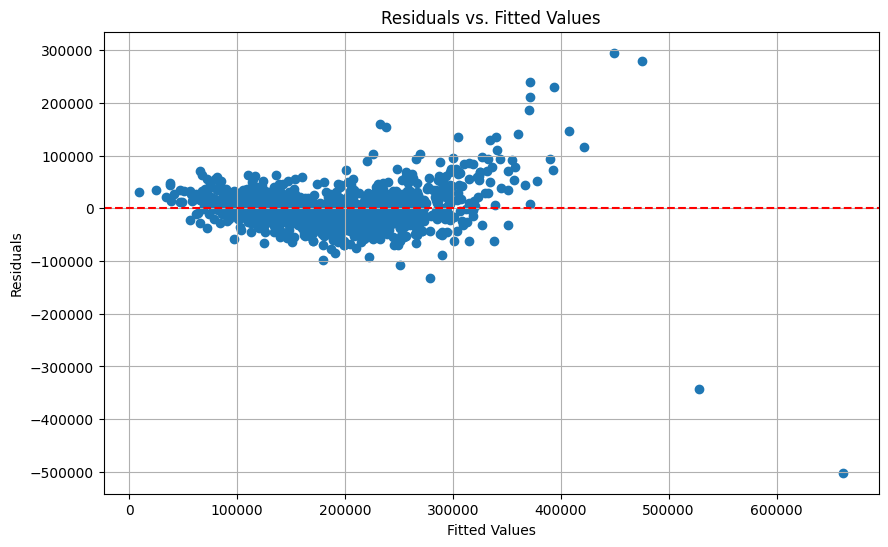

In [ ]:
# Calculate residuals
residuals = reg1.resid

# Generate Q-Q Plot
fig = sm.qqplot(residuals, fit=True, line='45')
plt.show()


# Residuals vs. Fitted
plt.figure(figsize=(10, 6))
plt.scatter(reg1.fittedvalues, residuals)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0
plt.grid(True)
plt.show()

### Remove any predictors that are not significant

In [ ]:
# remove OpenPorchSf
X = prices_regression.drop(columns=['SalePrice', 'OpenPorchSF'])
y = prices_regression['SalePrice']
X = sm.add_constant(X)
reg2 = sm.OLS(y, X).fit()

# Display regression summary
print(reg2.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     211.5
Date:                Mon, 09 Sep 2024   Prob (F-statistic):               0.00
Time:                        13:52:27   Log-Likelihood:                -17440.
No. Observations:                1460   AIC:                         3.493e+04
Df Residuals:                    1435   BIC:                         3.506e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           2.87e+05   1.51e+06      0.191

In [ ]:
X = prices_regression.drop(columns=['SalePrice', 'OpenPorchSF', 'LotConfig'])
y = prices_regression['SalePrice']
X = sm.add_constant(X)
reg3 = sm.OLS(y, X).fit()

# Display regression summary
print(reg3.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     220.9
Date:                Mon, 09 Sep 2024   Prob (F-statistic):               0.00
Time:                        13:52:27   Log-Likelihood:                -17440.
No. Observations:                1460   AIC:                         3.493e+04
Df Residuals:                    1436   BIC:                         3.505e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2.854e+05   1.51e+06      0.190

In [ ]:
X = prices_regression.drop(columns=['SalePrice', 'OpenPorchSF', 'LotConfig', 'FullBath'])
y = prices_regression['SalePrice']
X = sm.add_constant(X)
reg4 = sm.OLS(y, X).fit()

# Display regression summary
print(reg4.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     231.1
Date:                Mon, 09 Sep 2024   Prob (F-statistic):               0.00
Time:                        13:52:27   Log-Likelihood:                -17440.
No. Observations:                1460   AIC:                         3.493e+04
Df Residuals:                    1437   BIC:                         3.505e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2.743e+05    1.5e+06      0.182

In [ ]:
X = prices_regression.drop(columns=['SalePrice', 'OpenPorchSF', 'LotConfig', 'FullBath', 'CentralAir'])
y = prices_regression['SalePrice']
X = sm.add_constant(X)
reg5 = sm.OLS(y, X).fit()

# Display regression summary
print(reg5.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     242.2
Date:                Mon, 09 Sep 2024   Prob (F-statistic):               0.00
Time:                        13:52:27   Log-Likelihood:                -17440.
No. Observations:                1460   AIC:                         3.492e+04
Df Residuals:                    1438   BIC:                         3.504e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           2.72e+05    1.5e+06      0.181

In [ ]:
X = prices_regression.drop(columns=['SalePrice', 'OpenPorchSF', 'LotConfig', 'FullBath', 'CentralAir', 'PavedDrive'])
y = prices_regression['SalePrice']
X = sm.add_constant(X)
reg6 = sm.OLS(y, X).fit()

# Display regression summary
print(reg6.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                     254.5
Date:                Mon, 09 Sep 2024   Prob (F-statistic):               0.00
Time:                        13:52:27   Log-Likelihood:                -17440.
No. Observations:                1460   AIC:                         3.492e+04
Df Residuals:                    1439   BIC:                         3.503e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2.963e+05    1.5e+06      0.197

In [ ]:
X = prices_regression.drop(columns=['SalePrice', 'OpenPorchSF', 'LotConfig', 'FullBath', 'CentralAir', 'PavedDrive','EnclosedPorch' ])
y = prices_regression['SalePrice']
X = sm.add_constant(X)
reg7 = sm.OLS(y, X).fit()

# Display regression summary
print(reg7.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                     268.0
Date:                Mon, 09 Sep 2024   Prob (F-statistic):               0.00
Time:                        13:52:28   Log-Likelihood:                -17440.
No. Observations:                1460   AIC:                         3.492e+04
Df Residuals:                    1440   BIC:                         3.503e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         3.155e+05    1.5e+06      0.210   

In [ ]:
X = prices_regression.drop(columns=['SalePrice', 'OpenPorchSF', 'LotConfig', 'FullBath', 'CentralAir', 'PavedDrive','EnclosedPorch','HalfBath'  ])
y = prices_regression['SalePrice']
X = sm.add_constant(X)
reg8 = sm.OLS(y, X).fit()

# Display regression summary
print(reg8.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                     283.0
Date:                Mon, 09 Sep 2024   Prob (F-statistic):               0.00
Time:                        13:52:28   Log-Likelihood:                -17440.
No. Observations:                1460   AIC:                         3.492e+04
Df Residuals:                    1441   BIC:                         3.502e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         3.445e+05    1.5e+06      0.230   

In [ ]:
X = prices_regression.drop(columns=['SalePrice', 'OpenPorchSF', 'LotConfig', 'FullBath', 'CentralAir', 'PavedDrive','EnclosedPorch','HalfBath', '3SsnPorch'  ])
y = prices_regression['SalePrice']
X = sm.add_constant(X)
reg9 = sm.OLS(y, X).fit()

# Display regression summary
print(reg9.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                     299.7
Date:                Mon, 09 Sep 2024   Prob (F-statistic):               0.00
Time:                        13:52:28   Log-Likelihood:                -17441.
No. Observations:                1460   AIC:                         3.492e+04
Df Residuals:                    1442   BIC:                         3.501e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         3.168e+05    1.5e+06      0.211   

In [ ]:
X = prices_regression.drop(columns=['SalePrice', 'OpenPorchSF', 'LotConfig', 'FullBath', 'CentralAir', 'PavedDrive','EnclosedPorch','HalfBath', '3SsnPorch', 'YrSold'])
y = prices_regression['SalePrice']
X = sm.add_constant(X)
reg10 = sm.OLS(y, X).fit()

# Display regression summary
print(reg10.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                     318.4
Date:                Mon, 09 Sep 2024   Prob (F-statistic):               0.00
Time:                        13:52:28   Log-Likelihood:                -17441.
No. Observations:                1460   AIC:                         3.492e+04
Df Residuals:                    1443   BIC:                         3.501e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -1.045e+06   1.47e+05     -7.116   

In [ ]:
X = prices_regression.drop(columns=['SalePrice', 'OpenPorchSF', 'LotConfig', 'FullBath', 'CentralAir', 'PavedDrive','EnclosedPorch','HalfBath', '3SsnPorch', 'YrSold', 'Foundation'])
y = prices_regression['SalePrice']
X = sm.add_constant(X)
reg11 = sm.OLS(y, X).fit()

# Display regression summary
print(reg11.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                     339.4
Date:                Mon, 09 Sep 2024   Prob (F-statistic):               0.00
Time:                        13:52:28   Log-Likelihood:                -17442.
No. Observations:                1460   AIC:                         3.492e+04
Df Residuals:                    1444   BIC:                         3.500e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -1.115e+06   1.35e+05     -8.245   

In [ ]:
X = prices_regression.drop(columns=['SalePrice', 'OpenPorchSF', 'LotConfig', 'FullBath', 'CentralAir', 'PavedDrive','EnclosedPorch','HalfBath', '3SsnPorch', 'YrSold', 'Foundation', 'PoolArea'])
y = prices_regression['SalePrice']
X = sm.add_constant(X)
reg12 = sm.OLS(y, X).fit()

# Display regression summary
print(reg12.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     362.8
Date:                Mon, 09 Sep 2024   Prob (F-statistic):               0.00
Time:                        13:52:28   Log-Likelihood:                -17444.
No. Observations:                1460   AIC:                         3.492e+04
Df Residuals:                    1445   BIC:                         3.500e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -1.124e+06   1.35e+05     -8.313   

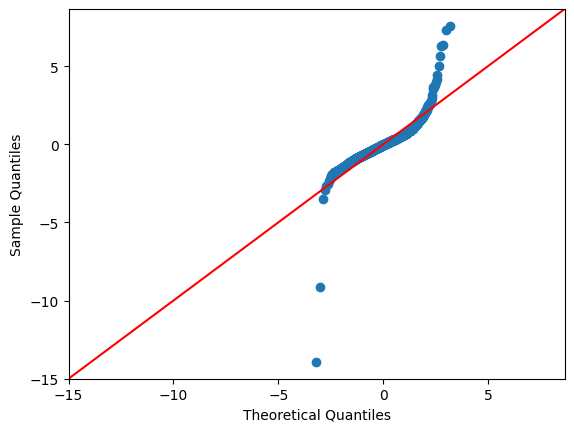

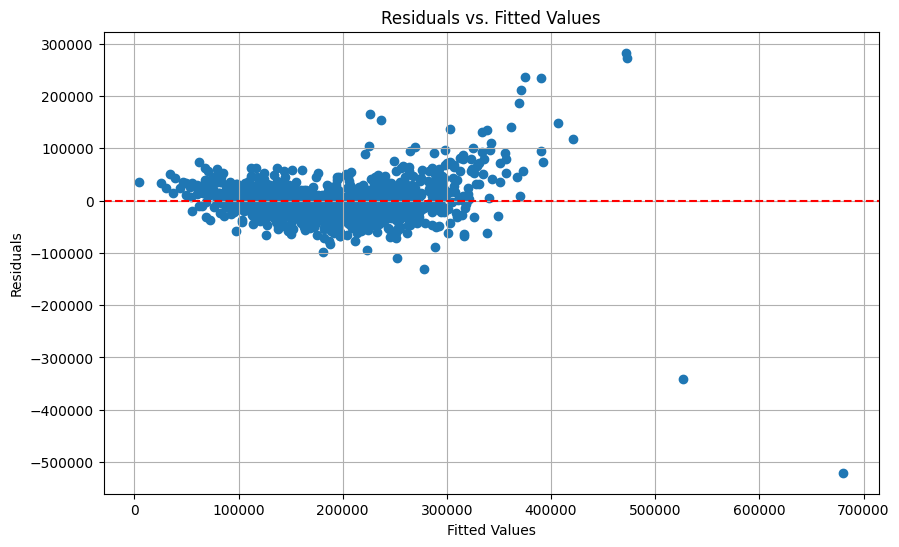

In [ ]:
# Calculate residuals
residuals = reg12.resid

# Generate Q-Q Plot
fig = sm.qqplot(residuals, fit=True, line='45')
plt.show()


# Residuals vs. Fitted
plt.figure(figsize=(10, 6))
plt.scatter(reg12.fittedvalues, residuals)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0
plt.grid(True)
plt.show()

# **Predict House Prices**

## Clean Data


In [ ]:
houses

,Id,LotArea,TotalBsmtSF,1stFlrSF,2ndFlrSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,...,PoolArea,LotConfig,BldgType,YearBuilt,YearRemodAdd,Foundation,CentralAir,KitchenQual,PavedDrive,YrSold
0,11_1,8450,0,856,854,2,1,3,8,0,...,0,Inside,1Fam,2003,2003,PConc,Y,Fa,Y,2011
1,11_2,9600,1262,1262,0,2,0,3,6,1,...,0,FR2,1Fam,1976,1976,CBlock,Y,TA,Y,2011
2,11_3,11250,920,920,866,2,1,3,6,1,...,0,Inside,1Fam,2001,2002,PConc,Y,Gd,Y,2011
3,11_4,11899,1175,1200,1142,3,1,4,12,2,...,0,CulDSac,1Fam,2005,2006,PConc,Y,Ex,Y,2011
4,11_5,10791,0,1296,0,2,0,2,6,0,...,0,Inside,Duplex,1967,1967,Slab,Y,TA,Y,2011


In [ ]:

houses['YrSold'] = pd.to_datetime(houses['YrSold'], format='%Y').dt.year
houses['YearBuilt'] = pd.to_datetime(houses['YearBuilt'], format='%Y').dt.year
houses['YearRemodAdd'] = pd.to_datetime(houses['YearRemodAdd'], format='%Y').dt.year

In [ ]:
houses['LotConfig'] = houses['LotConfig'].map({'Inside': 0, 'FR3': 1, 'FR2': 2, 'CulDSac': 3, 'Corner': 4})
houses['BldgType'] = houses['BldgType'].map({'1Fam': 0, '2fmCon': 1, 'Duplex': 2, 'Twnhs': 3, 'TwnhsE': 4})
houses['Foundation'] = houses['Foundation'].map({'BrkTil': 0, 'CBlock': 1, 'PConc': 2, 'Slab': 3, 'Stone': 4, 'Wood': 5})
houses['CentralAir'] = houses['CentralAir'].map({'Y': 0, 'N': 1})
houses['KitchenQual'] = houses['KitchenQual'].map({'Ex': 1, 'Gd': 2, 'TA': 3, 'Fa': 4})
houses['PavedDrive'] = houses['PavedDrive'].map({'Y': 0, 'N': 1, 'P': 2})

In [ ]:
houses.head()

,Id,LotArea,TotalBsmtSF,1stFlrSF,2ndFlrSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,...,PoolArea,LotConfig,BldgType,YearBuilt,YearRemodAdd,Foundation,CentralAir,KitchenQual,PavedDrive,YrSold
0,11_1,8450,0,856,854,2,1,3,8,0,...,0,0,0,2003,2003,2,0,4,0,2011
1,11_2,9600,1262,1262,0,2,0,3,6,1,...,0,2,0,1976,1976,1,0,3,0,2011
2,11_3,11250,920,920,866,2,1,3,6,1,...,0,0,0,2001,2002,2,0,2,0,2011
3,11_4,11899,1175,1200,1142,3,1,4,12,2,...,0,3,0,2005,2006,2,0,1,0,2011
4,11_5,10791,0,1296,0,2,0,2,6,0,...,0,0,2,1967,1967,3,0,3,0,2011


In [ ]:
# prompt: Apply regression model to predict home prices

# Select the relevant features for prediction
X_pred = prices_regression[['LotArea', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'WoodDeckSF', 'ScreenPorch', 'BldgType', 'YearBuilt', 'YearRemodAdd', 'KitchenQual']]
X_pred = sm.add_constant(X_pred)

# Make predictions using the fitted model
predictions = reg12.predict(X_pred)

# Add the predicted prices to the houses DataFrame
houses['PredictedSalePrice'] = predictions

# Print the houses DataFrame with predicted prices
print(houses[['Id', 'PredictedSalePrice']])

     Id  PredictedSalePrice
0  11_1       215665.153965
1  11_2       171076.519011
2  11_3       223729.128240
3  11_4       188639.804936
4  11_5       272131.404097
